In [1]:
import pandas as pd
import tweepy
import csv
import json


ACCESS_TOKEN = ''
ACCESS_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET =''

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)


c = tweepy.Cursor(api.search, q='coronavirus', lang='en')

count=201
page_needed=int(count/15) + 3 
c.pages(page_needed)

id_tweets = []
date = []
full_text_tweet =[]
for tweet in c.items():
    try:
        tweet = api.get_status(tweet.id, count=200, tweet_mode="extended")
        full_text_tweet.append(tweet.full_text)
        id_tweets.append(tweet.id)
    except:
        pass
    if len(full_text_tweet)==count: 
        break       
print("Total Data length", len(full_text_tweet))

Total Data length 201


In [2]:
tweets = pd.Series(full_text_tweet)

In [3]:
from sklearn.externals import joblib 
import string
import re
from keras.preprocessing.sequence import pad_sequences
import pickle
import pandas as pd

Using TensorFlow backend.


In [4]:
CNN = joblib.load('CNN_MODEL.pkl')
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
maxlen = 104


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [5]:
happyemoticon = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
sademoticon = r" :'?[/|\(] "

def preprocess_text(sen):
    text =  remove_tags(sen)
    text = re.sub('['+ string.punctuation +']',' ',text) #remove punctuation
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #Single character
    text = re.sub(r'\s+', ' ', text) #Removing multiple
    text = re.sub(r"([xX;:]-?[dD)]|:-?[\)]|[;:][pP])",happyemoticon,text)
    text = re.sub(r" :'?[/|\(] ",sademoticon,text)
    text = re.sub(r"(.)\1+", r"\1\1",text)
    text = re.sub(r"&\w+;", "",text)
    text = re.sub(r"https?://\S*", "",text)
    text = re.sub(r"https?://\S*", "",text)
    text = re.sub(r"&\w+;", "",text)
    
    return text

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)


In [6]:
filtered_text = []

for i in tweets:
    filtered_text.append(preprocess_text(str(i)))


In [7]:
pos_count=0
neg_count=0
neutral_count=0

In [8]:
sentiment = []
for i in range(len(filtered_text)):    
    example = filtered_text[i]
    instance = tokenizer.texts_to_sequences([example])
    flat_list = []
    for sublist in instance:
        for item in sublist:
            flat_list.append(item)
    
    flat_list = [flat_list]
    text_predict = pad_sequences(flat_list, padding='post', maxlen=maxlen)
    
    predicted_score = CNN.predict(text_predict)
    if predicted_score > 0.60:
        sentiment.append("😃")
        pos_count = pos_count+1

    elif predicted_score < 0.60 and predicted_score > 0.40:
        sentiment.append("😐")
        neutral_count = neutral_count+1

    else:
        sentiment.append("😔")
        neg_count = neg_count+1

        



In [9]:
sentiments = pd.Series(sentiment, name="Sentiment")
full_text_tweet = pd.Series(full_text_tweet, name="Tweet")        
result_dataframe = pd.concat([full_text_tweet, sentiments], axis=1)


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

C:\Users\Mert\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [10]:
result_dataframe

,Tweet,Sentiment
0,Pay close attention to the words: the President is saying testing CAUSES coronavirus infection. https://t.co/llimV4RB2S,😔
1,"Read our Tales of Hope: Community-led assets at the centre of responses to coronavirus. Featuring @KinningParkComp's Acts of Kindness project, @Inverclydeshed's community garden &amp; Cowie Rural Action Group's food delivery &amp; community support services - https://t.co/m1iF1PxVtj https://t.co/xARRbX6v5o",😃
2,"The New York Times, New York NY The U.S.A. 🇺🇸\nThe Truth Is Worth It @nytimes\n\nAbout Lies\n\nPence Misleadingly Blames Coronavirus Spikes on Rise in Testing https://t.co/AAXZ39ib8r",😔
3,"516 new cases in UP, active cases over 5,000\n.\n.\n.\nLive Updates: https://t.co/AkWDxlw1z6\n#CoronavirusIndia #COVID19India #COVID #CoronavirusOutbreakindia",😔
4,RT @Reuters: AstraZeneca COVID-19 vaccine likely to protect for a year - CEO https://t.co/gxt1sAolCn https://t.co/T6F6YeR9f4,😐
5,"Local, community organisations have been at the forefront of coronavirus responses in Scotland. We're not surprised so many of the groups we work with to take on assets have been well placed to provide effective support in their communities during this time 🙌 https://t.co/8SduGbfazA",😔
6,RT @politico: Florida Gov. Ron DeSantis' messaging is right in line with President Trump’s reelection campaign. Both want to shift the focu…,😃
7,RT @TuckerCarlson: The Press won’t blame China for the Coronavirus. So what was the press saying about the virus when it was still possibl…,😃
8,RT @theSNP: 📺 Watch live: First Minister @NicolaSturgeon's daily press conference on #coronavirus (#COVIDー19).\n\nJoining the First Minister…,😃
9,@mfstern @MollyJongFast @Mike_Pence Yeah the sad part is that this trump puppet was heading the coronavirus task force. 1st graders would have done a better job! Trump administration should be held accountable for more deaths then the Vietnam war,😔


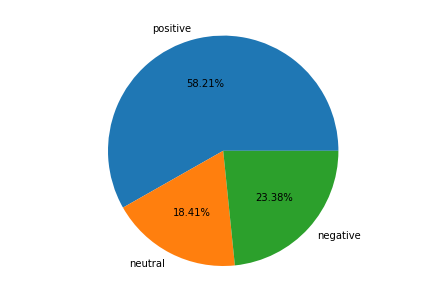

In [11]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['positive', 'neutral', 'negative']
prediction = [pos_count,neutral_count,neg_count]
ax.pie(prediction, labels = langs,autopct='%1.2f%%')
plt.show()